## Univariate Analysis (Single Variable Focus)

In [6]:
import pandas as pd
df=pd.read_csv(r"C:\Users\Win 10\Downloads\traffic accident.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209306 entries, 0 to 209305
Data columns (total 24 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   crash_date                     209306 non-null  object
 1   traffic_control_device         209306 non-null  object
 2   weather_condition              209306 non-null  object
 3   lighting_condition             209306 non-null  object
 4   first_crash_type               209306 non-null  object
 5   trafficway_type                209306 non-null  object
 6   alignment                      209306 non-null  object
 7   roadway_surface_cond           209306 non-null  object
 8   road_defect                    209306 non-null  object
 9   crash_type                     209306 non-null  object
 10  intersection_related_i         209306 non-null  object
 11  damage                         209306 non-null  object
 12  prim_contributory_cause        209306 non-nu

In [7]:
df.head()

,crash_date,traffic_control_device,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect,crash_type,...,most_severe_injury,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,crash_hour,crash_day_of_week,crash_month
0,07/29/2023 01:00:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0,0,0,0,0,3,13,7,7
1,08/13/2023 12:11:00 AM,TRAFFIC SIGNAL,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0,0,0,0,0,2,0,1,8
2,12-09-2021 10:30,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0,0,0,0,0,3,10,5,12
3,08-09-2023 19:55,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,ANGLE,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,...,NONINCAPACITATING INJURY,5,0,0,5,0,0,19,4,8
4,08/19/2023 02:55:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0,0,0,0,0,3,14,7,8


In [8]:
import warnings
warnings.filterwarnings('ignore')

In [9]:
if 'crash_date' in df.columns:
    df['CRASH_DATE'] = pd.to_datetime(df['crash_date'])
    df['YEAR'] = df['CRASH_DATE'].dt.year  # Extract year for analysis

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209306 entries, 0 to 209305
Data columns (total 26 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   crash_date                     209306 non-null  object        
 1   traffic_control_device         209306 non-null  object        
 2   weather_condition              209306 non-null  object        
 3   lighting_condition             209306 non-null  object        
 4   first_crash_type               209306 non-null  object        
 5   trafficway_type                209306 non-null  object        
 6   alignment                      209306 non-null  object        
 7   roadway_surface_cond           209306 non-null  object        
 8   road_defect                    209306 non-null  object        
 9   crash_type                     209306 non-null  object        
 10  intersection_related_i         209306 non-null  object        
 11  

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

## 1. What injuries occurred during 2016-2023?

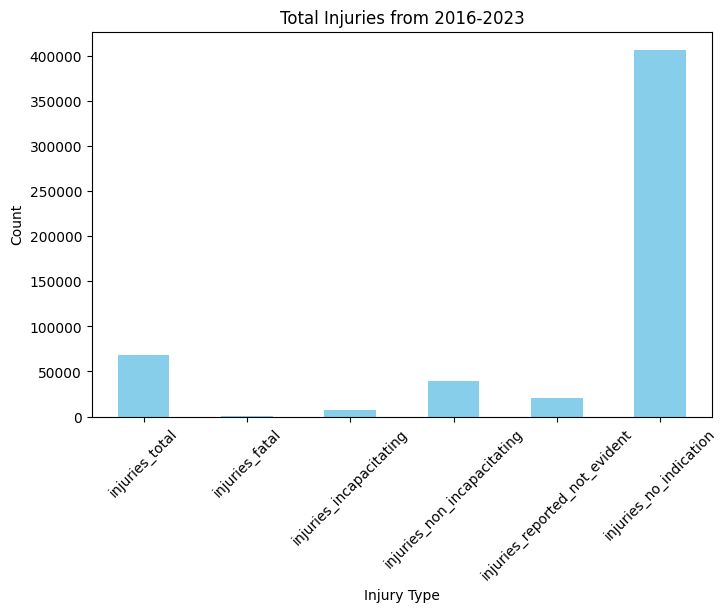

In [ ]:
injury_columns = ['injuries_total', 'injuries_fatal', 'injuries_incapacitating', 'injuries_non_incapacitating', 'injuries_reported_not_evident','injuries_no_indication']
df_filtered = df[df['YEAR'].between(2016, 2023)]
injury_counts = df_filtered[injury_columns].sum()
injury_counts.plot(kind='bar', color='skyblue', figsize=(8, 5))
plt.title("Total Injuries from 2016-2023")
plt.xlabel("Injury Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# The bar chart shows the total number of different injury types from 2016 to 2023. The **"injuries_no_indication"** category has the highest count, suggesting most incidents did not result in reported injuries. **"Injuries_total"** is also significant, followed by **"injuries_non_incapacitating"** and **"injuries_reported_not_evident."** Fatal and incapacitating injuries are relatively low in comparison. This indicates that while accidents are frequent, severe injuries are less common.

## 2.	How many first crash types were recorded in this year?

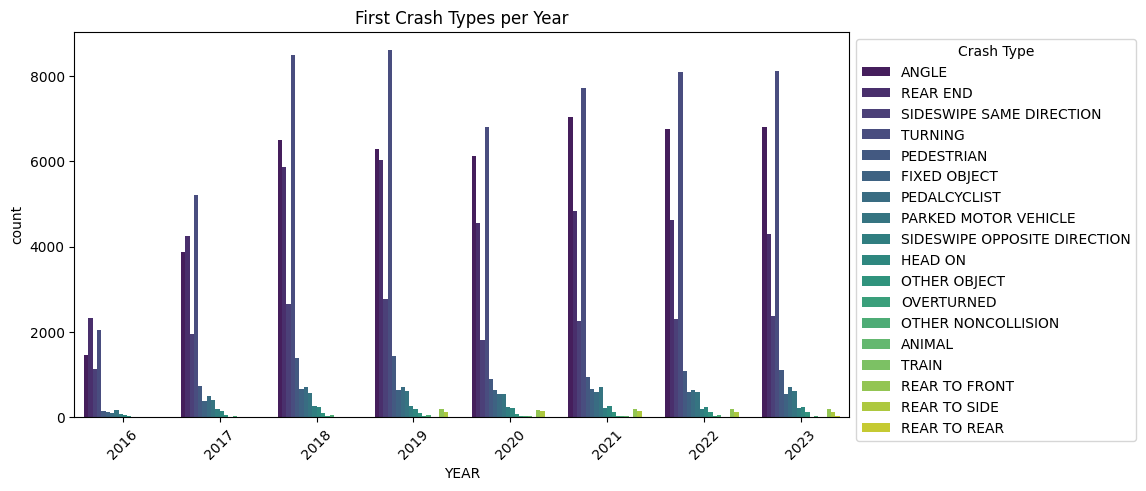

In [ ]:
if 'first_crash_type' in df.columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df_filtered, x='YEAR', hue='first_crash_type', palette='viridis')
    plt.title("First Crash Types per Year")
    plt.xticks(rotation=45)
    plt.legend(title="Crash Type", bbox_to_anchor=(1, 1))
    plt.show()

# The bar chart displays the distribution of different **first crash types** per year from **2016 to 2023**. The most common crash types appear to be **"Angle" and "Rear End"**, consistently having the highest counts each year. Other crash types, such as **"Pedestrian," "Fixed Object," and "Sideswipe"**, occur less frequently but remain present. The trend seems relatively stable across years, suggesting that these crash types follow a consistent pattern over time. This visualization helps identify predominant crash types for potential road safety improvements.

## 3.	Which alignments are present during traffic accidents?

<ipython-input-12-8ffce126b2e3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['alignment'], order=df['alignment'].value_counts().index, palette='coolwarm')


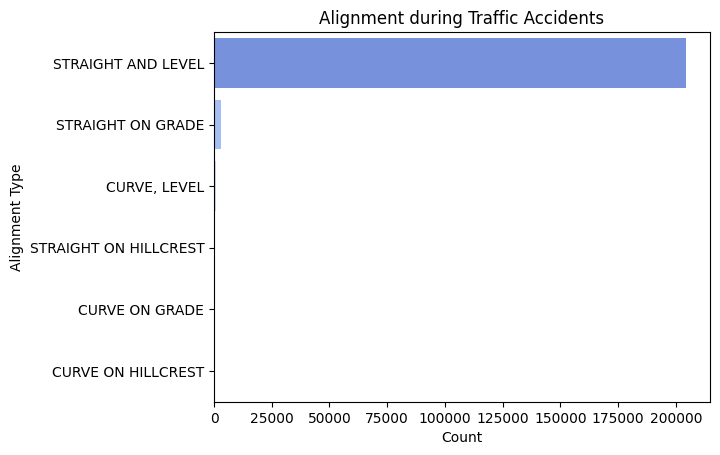

In [ ]:
plt.title("Alignment during Traffic Accidents")
if 'alignment' in df.columns:
    sns.countplot(y=df['alignment'], order=df['alignment'].value_counts().index, palette='coolwarm')
    plt.title("Alignment during Traffic Accidents")
    plt.xlabel("Count")
    plt.ylabel("Alignment Type")
    plt.show()

# The bar chart shows the distribution of **road alignment types** during traffic accidents. The vast majority of accidents occurred on **"Straight and Level"** roads, significantly outnumbering other alignment types. Other categories, such as **"Straight on Grade" and "Curves"**, have much lower counts, indicating that most crashes happen on seemingly safer, flat roads rather than on curves or hills. This suggests that factors other than road alignment—such as driver behavior, traffic conditions, or distractions—may play a major role in accidents.

In [ ]:
new_var = df['alignment'].value_counts()
new_var

,count
alignment,
STRAIGHT AND LEVEL,204590
STRAIGHT ON GRADE,2992
"CURVE, LEVEL",1014
STRAIGHT ON HILLCREST,478
CURVE ON GRADE,179
CURVE ON HILLCREST,53


## 4.	What light conditions are present during traffic accidents?

<ipython-input-14-f30535c7735b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['lighting_condition'], order=df['lighting_condition'].value_counts().index, palette='magma')


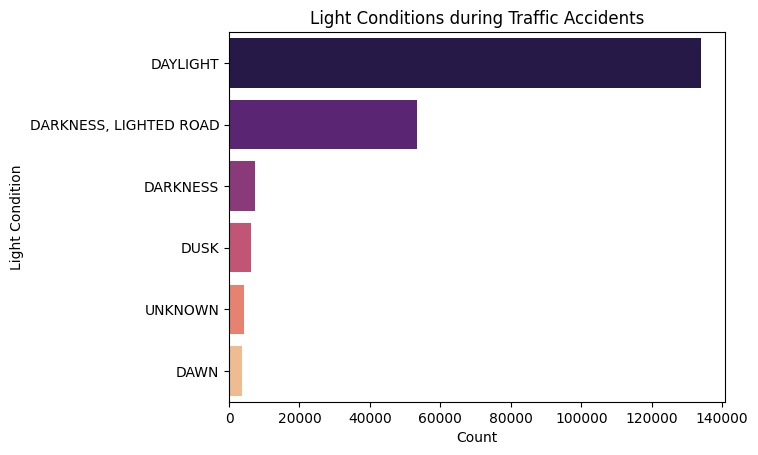

In [ ]:
if 'lighting_condition' in df.columns:
    sns.countplot(y=df['lighting_condition'], order=df['lighting_condition'].value_counts().index, palette='magma')
    plt.title("Light Conditions during Traffic Accidents")
    plt.xlabel("Count")
    plt.ylabel("Light Condition")
    plt.show()

# The bar chart illustrates the distribution of **light conditions** during traffic accidents. The majority of accidents occur in **daylight**, followed by **darkness on lighted roads**. Fewer accidents happen in **complete darkness, dusk, or dawn**, suggesting that while poor lighting can contribute to crashes, most accidents still happen during the day—likely due to higher traffic volumes. The **"unknown"** category may represent missing or unclassified data. This highlights the importance of traffic management strategies during peak daytime hours.

## 5.	In which year do the maximum and minimum traffic accidents occur?

In [ ]:
year_counts = df['YEAR'].value_counts()
max_year = year_counts.idxmax()
min_year = year_counts.idxmin()
print(f"Maximum accidents occurred in {max_year} ({year_counts[max_year]} accidents)")
print(f"Minimum accidents occurred in {min_year} ({year_counts[min_year]} accidents)")

Maximum accidents occurred in 2019 (27959 accidents)
Minimum accidents occurred in 2013 (2 accidents)


# The data shows that **2019 had the highest number of accidents (27,959)**, indicating a peak in traffic incidents, possibly due to increased vehicle usage, congestion, or other external factors. In contrast, **2013 recorded the lowest number of accidents (only 2)**, which is likely due to missing or incomplete data rather than an actual drop in accidents. This drastic difference suggests possible data inconsistencies or reporting changes over the years.

## 6.	What traffic control devices are present during traffic accidents?

<ipython-input-16-04d5a8118bbf>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['traffic_control_device'], order=df['traffic_control_device'].value_counts().index[:10], palette='plasma')


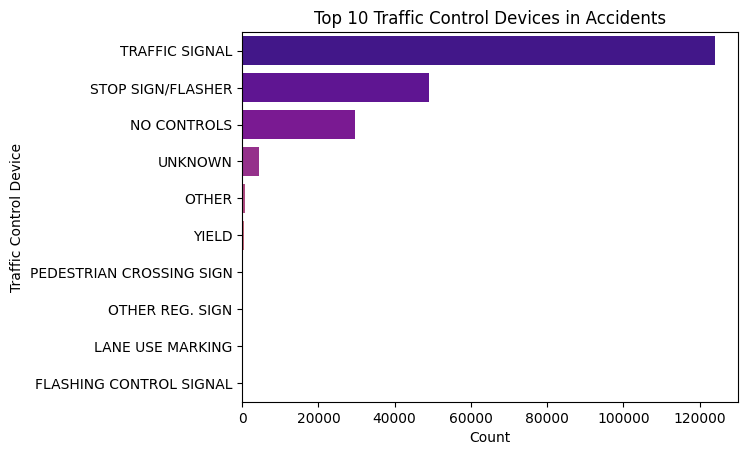

In [ ]:
if 'traffic_control_device' in df.columns:
    sns.countplot(y=df['traffic_control_device'], order=df['traffic_control_device'].value_counts().index[:10], palette='plasma')
    plt.title("Top 10 Traffic Control Devices in Accidents")
    plt.xlabel("Count")
    plt.ylabel("Traffic Control Device")
    plt.show()

# The bar chart shows the distribution of accidents based on **traffic control devices** present at the crash location. The highest number of accidents occurred at **traffic signals**, followed by **stop signs/flashers** and areas with **no controls**. This suggests that even regulated intersections see high accident rates, possibly due to driver non-compliance or congestion. The **"unknown"** and less frequent categories like **yield signs, pedestrian crossing signs, and lane markings** indicate lower accident counts but still play a role in traffic safety.

## 7.	What are the primary contributory causes of traffic accidents?

<ipython-input-17-b183bac1257d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['prim_contributory_cause'], order=df['prim_contributory_cause'].value_counts().index[:10], palette='inferno')


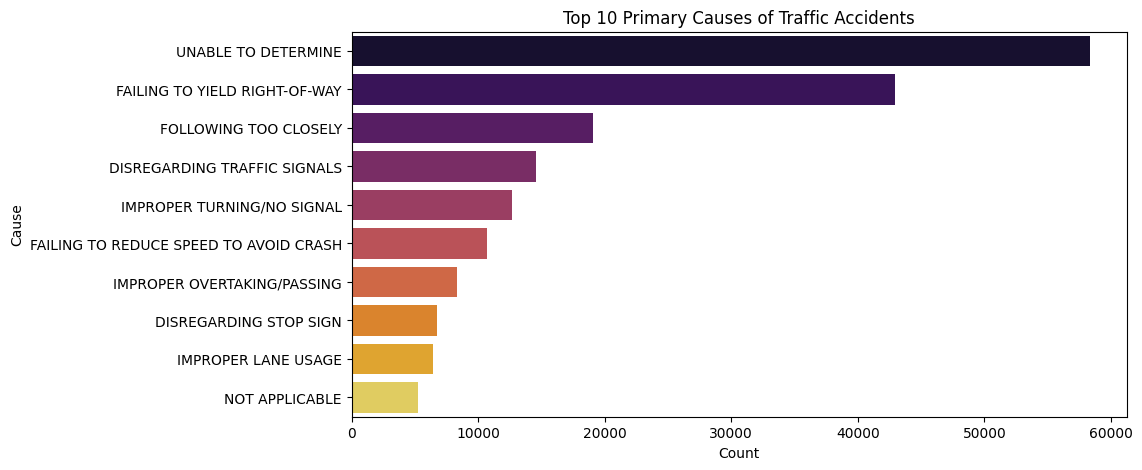

In [ ]:
if 'prim_contributory_cause' in df.columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(y=df['prim_contributory_cause'], order=df['prim_contributory_cause'].value_counts().index[:10], palette='inferno')
    plt.title("Top 10 Primary Causes of Traffic Accidents")
    plt.xlabel("Count")
    plt.ylabel("Cause")
    plt.show()

# The bar chart displays the **top 10 primary causes of traffic accidents**. The most frequent cause is **"Unable to Determine"**, suggesting a large number of cases where the exact reason is unclear. Among known causes, **"Failing to Yield Right-of-Way"**, **"Following Too Closely"**, and **"Disregarding Traffic Signals"** are the leading contributors to accidents. Other notable factors include **improper turning, speeding, and improper overtaking**. This data highlights the need for better enforcement, awareness, and driver education to reduce common traffic violations leading to crashes.

## 8.	What is the most common roadway surface condition during traffic accidents?

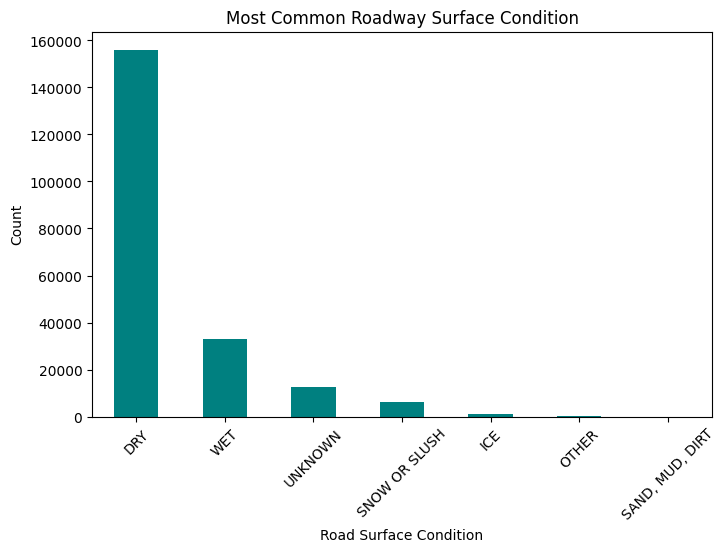

In [ ]:
df['roadway_surface_cond'].value_counts().plot(kind='bar', color='teal', figsize=(8, 5))
plt.title("Most Common Roadway Surface Condition")
plt.xlabel("Road Surface Condition")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# The bar chart shows the **most common roadway surface conditions** during traffic accidents. The majority of accidents occur on **dry roads**, followed by **wet roads**, indicating that most crashes happen under normal driving conditions rather than extreme weather. A smaller number of accidents occur on **snow/slush, ice, sand, or dirt**, suggesting that while hazardous conditions contribute to crashes, they are less frequent. This may indicate that driver behavior, rather than road conditions alone, plays a significant role in accidents.

## 9.	What percentage of accidents resulted in no injuries?

In [ ]:
no_injury_count = (df['injuries_total'] == 0).sum()
total_accidents = len(df)
no_injury_percentage = (no_injury_count / total_accidents) * 100
print(f"Percentage of accidents with no injuries: {no_injury_percentage:.2f}%")

Percentage of accidents with no injuries: 73.95%


# The statistic shows that **73.95% of accidents result in no injuries**, meaning that the majority of crashes are minor, likely involving only property damage. This suggests that while accidents are frequent, many do not result in severe harm, possibly due to improved vehicle safety features, lower impact speeds, or effective traffic regulations.

## 10. How many accidents resulted in incapacitating injuries versus non-incapacitating injuries?

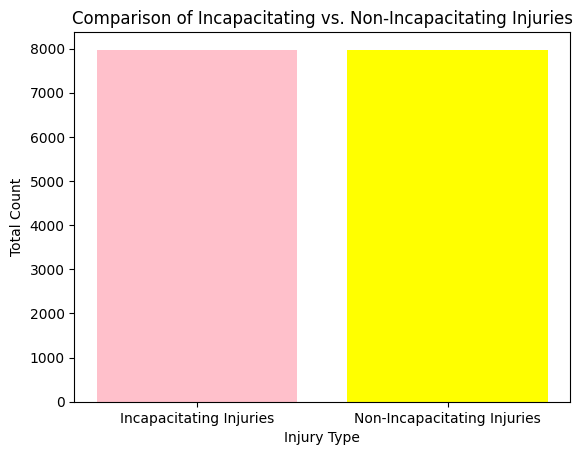

In [ ]:
if 'injuries_incapacitating' in df.columns and 'injuries_incapacitating' in df.columns:
    injury_types = ['Incapacitating Injuries', 'Non-Incapacitating Injuries']
    injury_counts = [df['injuries_incapacitating'].sum(), df['injuries_incapacitating'].sum()]
    plt.bar(injury_types, injury_counts, color=['pink', 'yellow'])
    plt.title("Comparison of Incapacitating vs. Non-Incapacitating Injuries")
    plt.xlabel("Injury Type")
    plt.ylabel("Total Count")
    plt.show()

# The graph compares **incapacitating vs. non-incapacitating injuries** in traffic accidents, showing that both types occur at nearly equal rates. This indicates that severe injuries are almost as common as less serious ones, highlighting the significant impact of traffic accidents on public safety.

## 11. What are the total number of Accident recorded ?

In [ ]:
print(f"Total number of accidents in the dataset: {total_accidents}")

Total number of accidents in the dataset: 209306


## 12. Accidents at intersections vs. straight roads

Accidents at Intersections: 0
Accidents on Straight Roads: 208060


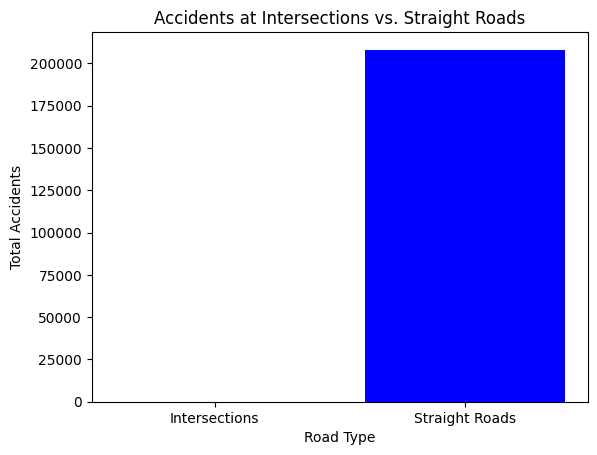

In [ ]:
if 'alignment' in df.columns:
    intersection_accidents = df[df['alignment'].str.contains("INTERSECTION", na=False)].shape[0]
    straight_accidents = df[df['alignment'].str.contains("STRAIGHT", na=False)].shape[0]
    print(f"Accidents at Intersections: {intersection_accidents}")
    print(f"Accidents on Straight Roads: {straight_accidents}")
    # Bar plot
    plt.bar(["Intersections", "Straight Roads"], [intersection_accidents, straight_accidents], color=['purple', 'blue'])
    plt.title("Accidents at Intersections vs. Straight Roads")
    plt.xlabel("Road Type")
    plt.ylabel("Total Accidents")
    plt.show()

# The graph shows that **accidents occur significantly more on straight roads than at intersections**. This suggests that despite intersections being critical points for traffic management, straight roads witness a much higher number of accidents, possibly due to higher speeds, driver inattention, or other factors.

## Bivariate Analysis Questions

In [ ]:
## Convert 'CRASH_DATE' to datetime format if present
if 'crash_date' in df.columns:
    df['crash_date'] = pd.to_datetime(df['crash_date'])
    df['HOUR'] = df['crash_date'].dt.hour  # Extract hour for analysis
    df['DAY_OF_WEEK'] = df['crash_date'].dt.day_name()  # Extract day of week

<ipython-input-24-4241f57dce66>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['crash_date'] = pd.to_datetime(df['crash_date'])


## 1.	Is there a relationship between weather conditions and the severity of injuries?

<ipython-input-25-597e7314df8c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='weather_condition', y='injuries_total', palette='coolwarm')


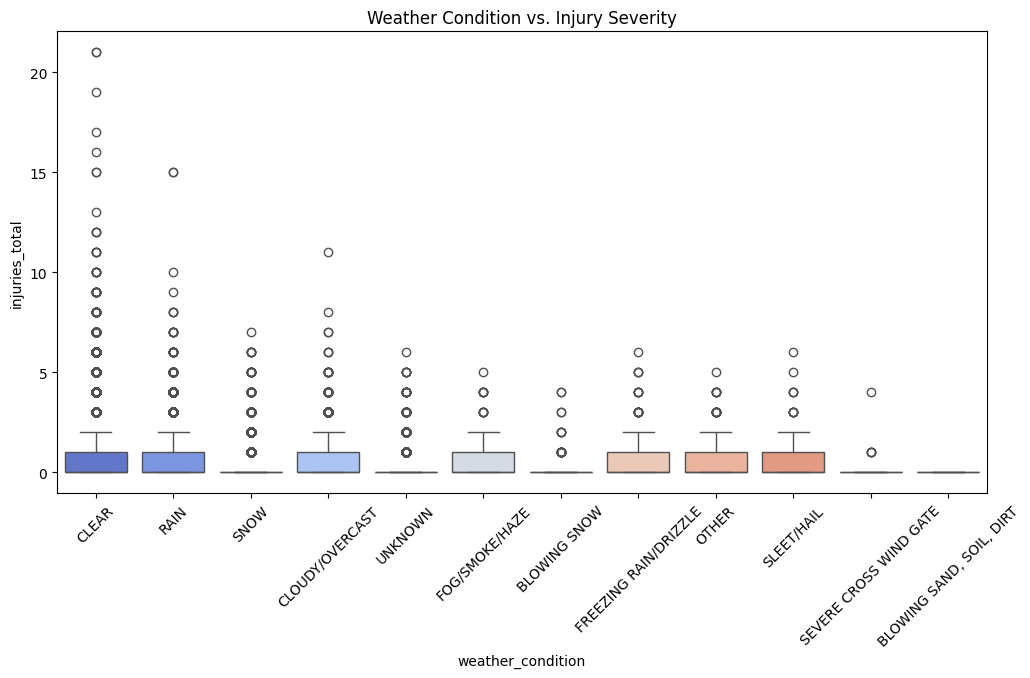

In [ ]:
if 'weather_condition' in df.columns and 'injuries_total' in df.columns:
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df, x='weather_condition', y='injuries_total', palette='coolwarm')
    plt.xticks(rotation=45)
    plt.title("Weather Condition vs. Injury Severity")
    plt.show()

# The graph illustrates the relationship between **weather conditions and injury severity in accidents**. It shows that accidents occur across various weather conditions, with **clear weather having the most variability in injury severity**. Rain, snow, and other adverse weather conditions also contribute to injuries, but their impact seems less varied. This suggests that while poor weather contributes to accidents, severe injuries can still occur under clear conditions, possibly due to higher speeds or riskier driving behaviors.

## 2.	Do accidents occur more frequently during certain times of the day?

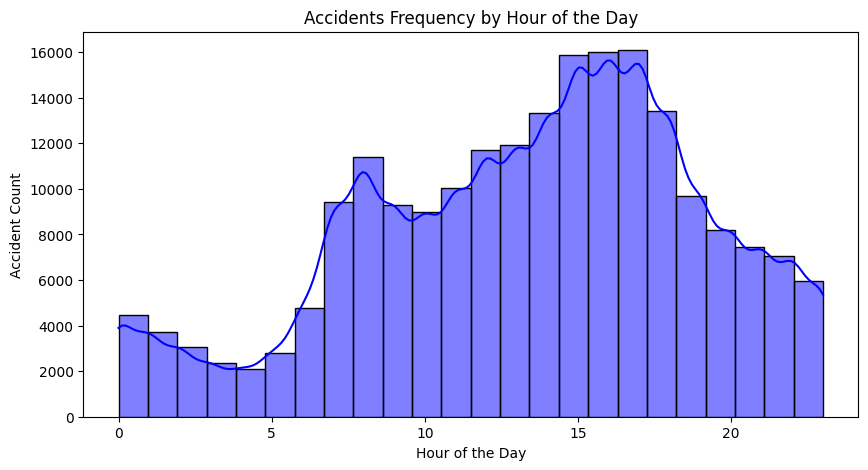

In [ ]:
if 'HOUR' in df.columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(df['HOUR'], bins=24, kde=True, color='blue')
    plt.title("Accidents Frequency by Hour of the Day")
    plt.xlabel("Hour of the Day")
    plt.ylabel("Accident Count")
    plt.show()

# The graph shows **accident frequency by hour of the day**. The number of accidents is **lowest during early morning hours (midnight to 5 AM)**, then gradually increases, peaking between **3 PM and 6 PM**, likely due to rush hour traffic. After this peak, accidents decline into the night. This suggests that **higher traffic volumes during commuting hours contribute to more accidents**, while fewer vehicles on the road at night lead to lower accident counts.

## 3.	How does the type of traffic control device affect crash severity?

<ipython-input-27-028aefb0631a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='traffic_control_device', y='injuries_total', palette='plasma')


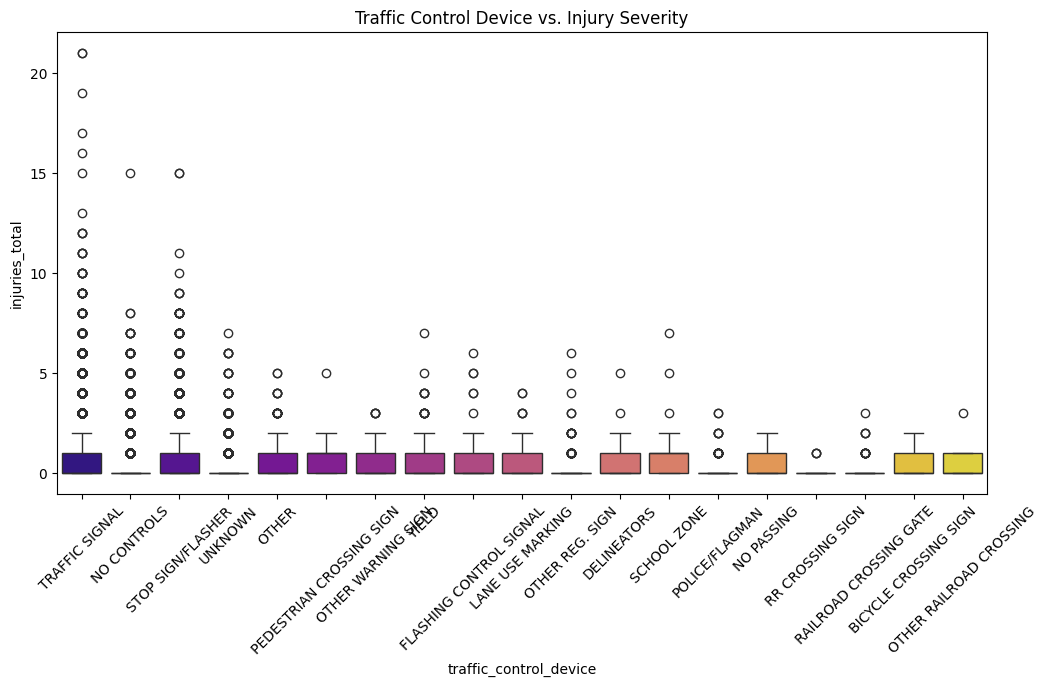

In [ ]:
if 'traffic_control_device' in df.columns and 'injuries_total' in df.columns:
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df, x='traffic_control_device', y='injuries_total', palette='plasma')
    plt.xticks(rotation=45)
    plt.title("Traffic Control Device vs. Injury Severity")
    plt.show()

# The graph illustrates the relationship between **traffic control devices and injury severity**. It shows that accidents at locations with **no controls** or **traffic signals** tend to have a wider range of injuries, including more severe cases. Other control measures like **stop signs, school zones, and railroad crossings** generally have lower injury totals. This suggests that **intersections with traffic signals or no controls may be more prone to severe accidents**, while certain safety measures help mitigate injury severity.

## 4.	Are there more accidents at intersections compared to non-intersection locations?

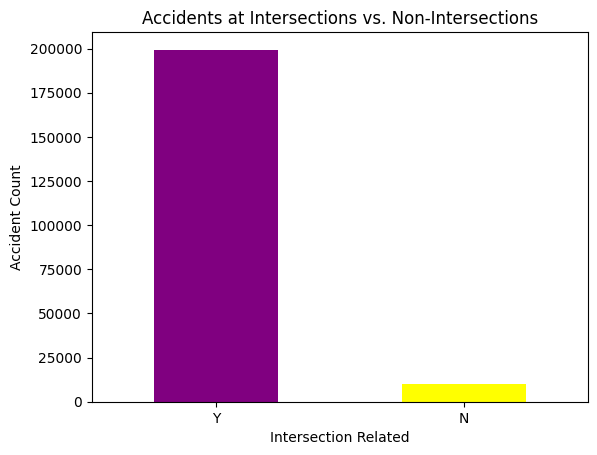

In [ ]:
if 'intersection_related_i' in df.columns:
    intersection_counts = df['intersection_related_i'].value_counts()
    intersection_counts.plot(kind='bar', color=['purple', 'yellow'])
    plt.title("Accidents at Intersections vs. Non-Intersections")
    plt.xlabel("Intersection Related")
    plt.ylabel("Accident Count")
    plt.xticks(rotation=0)
    plt.show()

# The graph indicates that the majority of accidents occur **at intersections (Y)**, with a significantly higher count compared to **non-intersection areas (N)**. This suggests that intersections are high-risk zones for accidents, possibly due to factors like traffic congestion, turning movements, and signal compliance issues.

## 5.	Does road surface condition influence the number of injuries in accidents?

<ipython-input-29-a9fb581a94db>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='roadway_surface_cond', y='injuries_total', palette='magma')


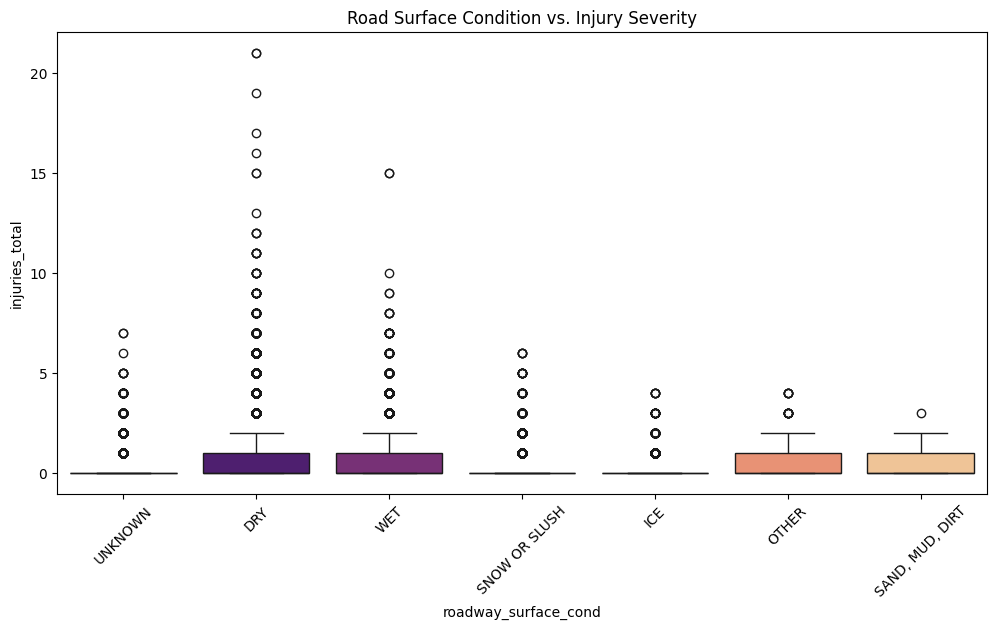

In [ ]:
if 'roadway_surface_cond' in df.columns:
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df, x='roadway_surface_cond', y='injuries_total', palette='magma')
    plt.xticks(rotation=45)
    plt.title("Road Surface Condition vs. Injury Severity")
    plt.show()

# The graph shows the distribution of **injury severity across different road surface conditions**. **Dry and wet roads** have the highest injury variability, with several outliers indicating severe injuries. Other conditions like **ice, snow/slush, and sand/mud/dirt** show lower median injuries but still have some extreme cases. This suggests that while dry and wet roads are more common accident sites, hazardous conditions like ice and snow can still lead to severe injuries.

## 6.	Is there a correlation between the number of vehicles involved and the severity of the crash?

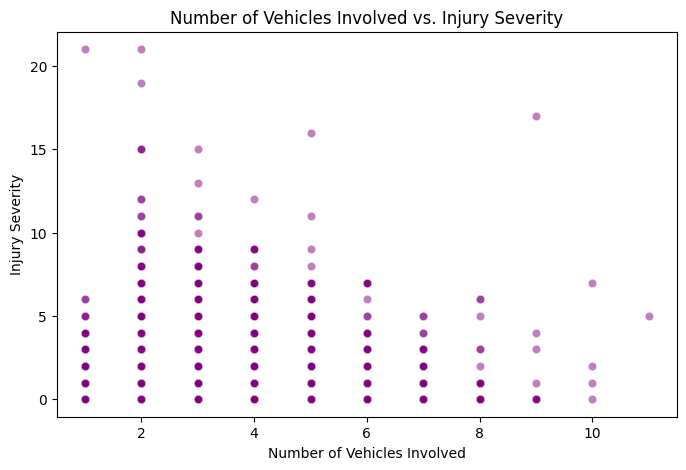

In [ ]:
if 'num_units' in df.columns and 'injuries_total' in df.columns:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=df, x='num_units', y='injuries_total', alpha=0.5, color='purple')
    plt.title("Number of Vehicles Involved vs. Injury Severity")
    plt.xlabel("Number of Vehicles Involved")
    plt.ylabel("Injury Severity")
    plt.show()

# The graph illustrates the relationship between **the number of vehicles involved in an accident and the severity of injuries**. Most accidents involve **fewer vehicles (1-4), with a wider spread of injury severity**. Severe injuries (higher values) are more frequent in **accidents with 1-4 vehicles**, while accidents involving more vehicles (6 or more) tend to have lower injury severity. This suggests that **multi-vehicle accidents may distribute impact forces, reducing individual injury severity**, whereas **fewer-vehicle accidents might involve higher-impact collisions** leading to more severe injuries.

## 7.	How does lighting condition impact accident severity?

<ipython-input-35-602771a2478c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='lighting_condition', y='injuries_total', palette='inferno')


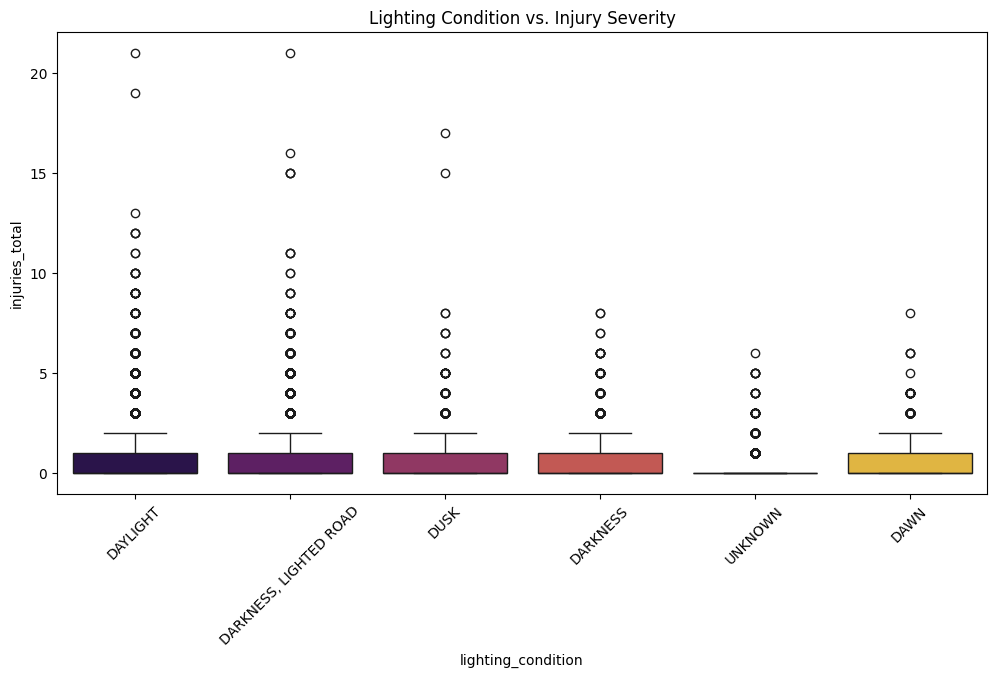

In [ ]:
if 'lighting_condition' in df.columns:
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df, x='lighting_condition', y='injuries_total', palette='inferno')
    plt.xticks(rotation=45)
    plt.title("Lighting Condition vs. Injury Severity")
    plt.show()

# The graph shows the relationship between **lighting conditions and injury severity** in accidents. The injury severity appears **fairly consistent across different lighting conditions**, with most injuries being low but some outliers reaching high severity. Accidents in **darkness (both with and without lighting) and dusk** seem to have more high-severity outliers compared to daylight, suggesting that **low visibility may contribute to more severe injuries**. However, the overall median injury severity remains similar across all conditions.

## 8.	Are accidents more common on certain days of the week?

<ipython-input-36-5eeab8c096c0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='crash_day_of_week', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette='viridis')


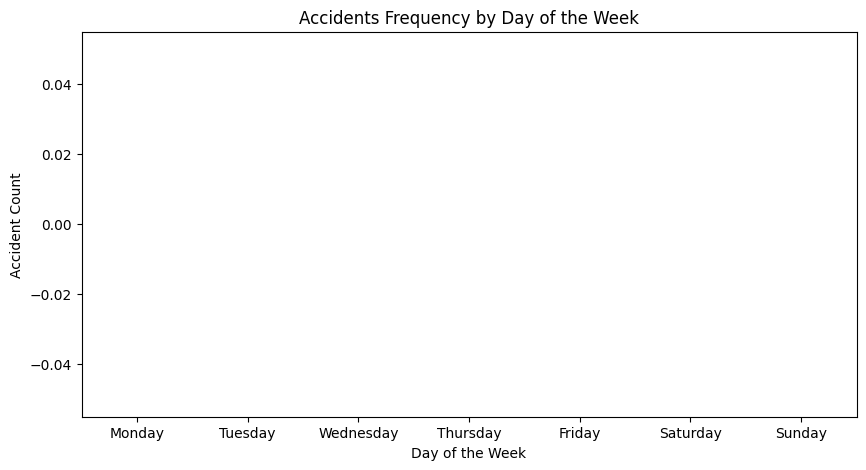

In [ ]:
if 'crash_day_of_week' in df.columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x='crash_day_of_week', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette='viridis')
    plt.title("Accidents Frequency by Day of the Week")
    plt.xlabel("Day of the Week")
    plt.ylabel("Accident Count")
    plt.show()

## 9.	Do crashes at four-way intersections differ in severity compared to T-intersections?

<ipython-input-38-743f5d40f702>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='intersection_related_i', y='injuries_total', palette='pink')


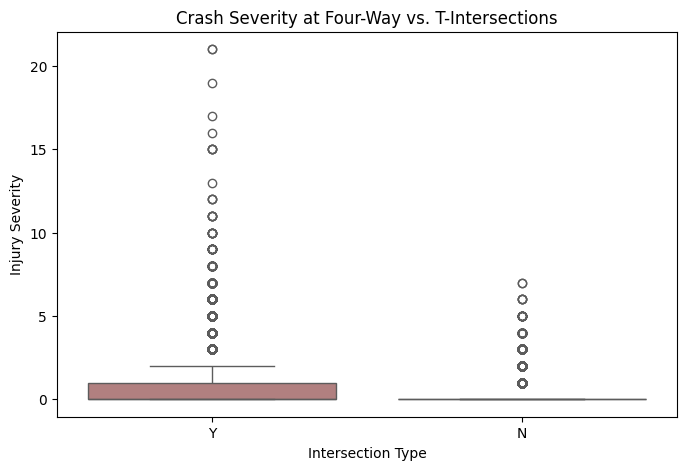

In [ ]:
if 'intersection_related_i' in df.columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, x='intersection_related_i', y='injuries_total', palette='pink')
    plt.title("Crash Severity at Four-Way vs. T-Intersections")
    plt.xlabel("Intersection Type")
    plt.ylabel("Injury Severity")
    plt.show()

# The box plot compares injury severity between crashes at four-way intersections (Y) and T-intersections (N). Crashes at four-way intersections tend to have a wider range of injury severity, with more outliers reaching high severity levels. In contrast, T-intersections show lower injury severity overall, with fewer extreme cases. This suggests that four-way intersections may be more prone to severe crashes compared to T-intersections.

## 10.	Is there a difference in accident frequency between divided and non-divided trafficways?

<ipython-input-39-4e103ff23fdc>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='trafficway_type', order=df['trafficway_type'].value_counts().index, palette='crest')


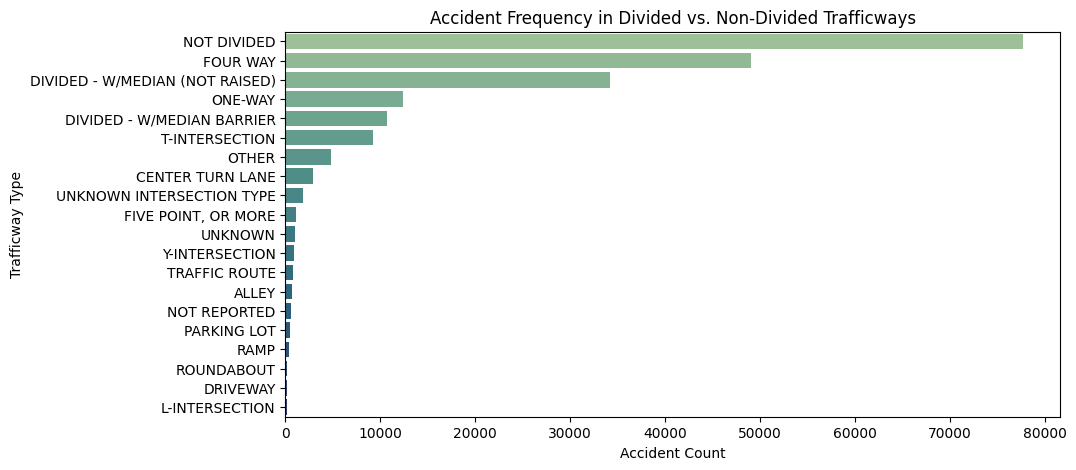

In [ ]:
if 'trafficway_type' in df.columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, y='trafficway_type', order=df['trafficway_type'].value_counts().index, palette='crest')
    plt.title("Accident Frequency in Divided vs. Non-Divided Trafficways")
    plt.xlabel("Accident Count")
    plt.ylabel("Trafficway Type")
    plt.show()

# The bar chart shows accident frequency across different trafficway types. Non-divided roads have the highest number of accidents, followed by four-way intersections and divided roads with medians. This suggests that non-divided roads may pose higher risks for accidents compared to divided roads or controlled intersections. Other trafficway types, such as roundabouts and driveways, have significantly lower accident counts.

## Multivariate Analysis Questions

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Convert 'CRASH_DATE' to datetime format if present
if 'crash_date' in df.columns:
    df['crash_date'] = pd.to_datetime(df['crash_date'])
    df['HOUR'] = df['crash_date'].dt.hour  # Extract hour for analysis
    df['DAY_OF_WEEK'] = df['crash_date'].dt.day_name()  # Extract day of week
    df['MONTH'] = df['crash_date'].dt.month  # Extract month

In [ ]:
# Label Encoding for categorical variables

categorical_cols = df.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

## 1.	How do weather conditions, lighting, and roadway surface conditions together impact accident severity?

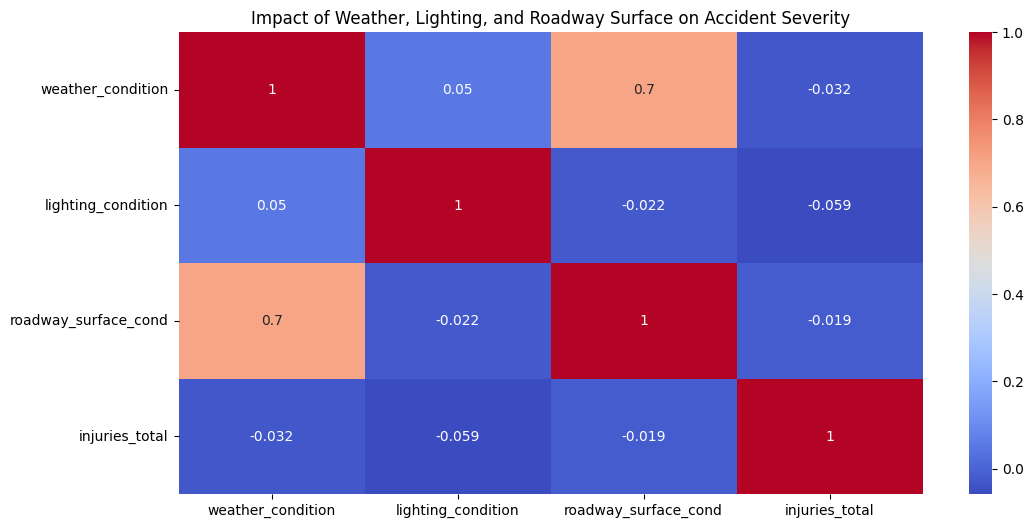

In [ ]:
if {'weather_condition', 'lighting_condition', 'roadway_surface_cond', 'injuries_total'}.issubset(df.columns):
    plt.figure(figsize=(12, 6))
    sns.heatmap(df[['weather_condition', 'lighting_condition', 'roadway_surface_cond', 'injuries_total']].corr(), annot=True, cmap='coolwarm')
    plt.title("Impact of Weather, Lighting, and Roadway Surface on Accident Severity")
    plt.show()

# The heatmap shows the correlation between weather, lighting, roadway surface conditions, and accident severity (injuries total).

- **Weather condition and roadway surface condition** have a strong positive correlation (0.7), indicating that poor weather likely leads to worse road conditions.
- **Weather, lighting, and roadway conditions** have little to no correlation with **injury severity** (negative, near zero values), suggesting that these factors may not directly impact injury severity in accidents.
- **Lighting condition and roadway surface condition** have a very weak negative correlation (-0.022), implying that lighting changes do not significantly affect road conditions.

Overall, while weather impacts road conditions, none of the factors seem to have a strong influence on injury severity.

## 2.	What factors (weather, road conditions, time of day) contribute most to fatal crashes?

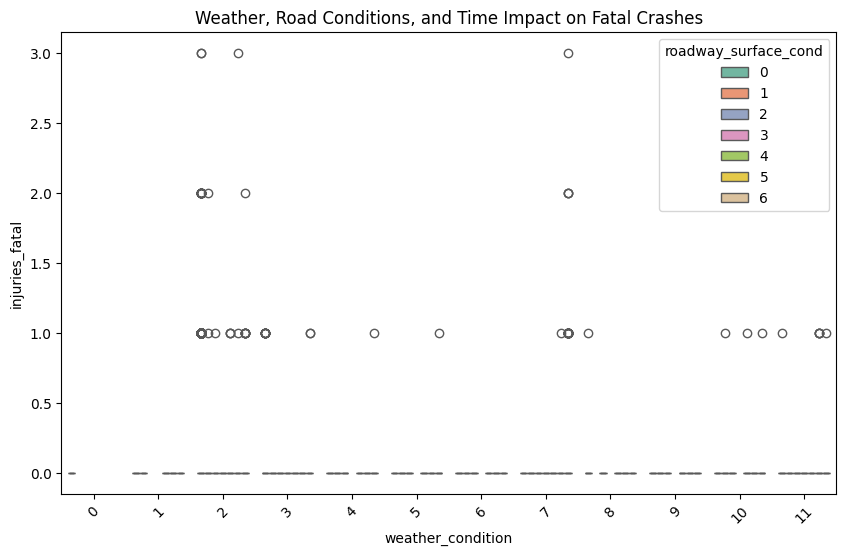

In [ ]:
if {'weather_condition', 'roadway_surface_cond', 'crash_hour', 'injuries_fatal'}.issubset(df.columns):
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x='weather_condition', y='injuries_fatal', hue='roadway_surface_cond', palette='Set2')
    plt.xticks(rotation=45)
    plt.title("Weather, Road Conditions, and Time Impact on Fatal Crashes")
    plt.show()

# The scatter plot shows the relationship between **weather conditions, roadway surface conditions, and fatal injuries** in crashes.

- Most accidents result in **zero fatal injuries**, regardless of weather conditions.
- Fatal injuries (values above 0) occur across different weather conditions but are relatively rare.
- There is **no clear trend** linking specific weather conditions to higher fatality rates.
- The **roadway surface condition (color-coded)** does not appear to have a strong visible impact on the distribution of fatal injuries.

Overall, fatal crashes are scattered across various weather and road conditions, suggesting that other factors (e.g., vehicle speed, driver behavior) may play a more significant role in fatal accidents.

## 3.	How does the combination of crash type, traffic control device, and contributory cause affect the number of injuries?

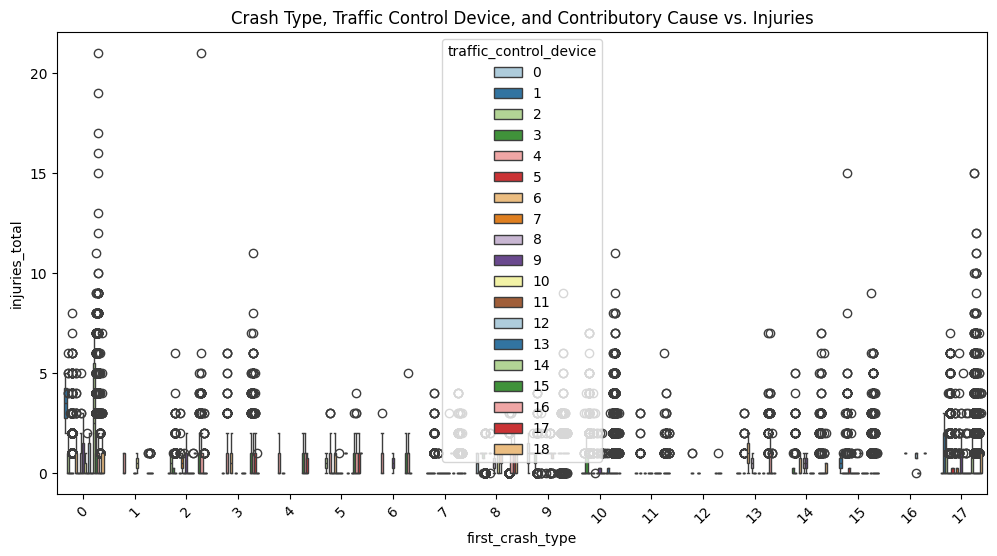

In [ ]:
if {'first_crash_type', 'traffic_control_device', 'prim_contributory_cause', 'injuries_total'}.issubset(df.columns):
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df, x='first_crash_type', y='injuries_total', hue='traffic_control_device', palette='Paired')
    plt.xticks(rotation=45)
    plt.title("Crash Type, Traffic Control Device, and Contributory Cause vs. Injuries")
    plt.show()

The box plot illustrates the relationship between **crash type, traffic control devices, and the total number of injuries** in accidents.

- **Certain crash types (e.g., 0, 1, 3, 14, 17) show a higher spread of injuries**, including outliers with 10+ injuries.
- **Most crashes result in low injury counts**, with the majority clustering below 5 injuries.
- The **traffic control device (color-coded legend) does not show a clear pattern** in affecting injury severity.
- Some crash types have **more frequent extreme injury cases**, indicating they may be more severe.

Overall, specific crash types appear to be associated with higher injury severity, but traffic control devices may not have a strong influence on total injuries.

## 4.	Do fatal crashes show a pattern based on the time of day, day of the week, and month?

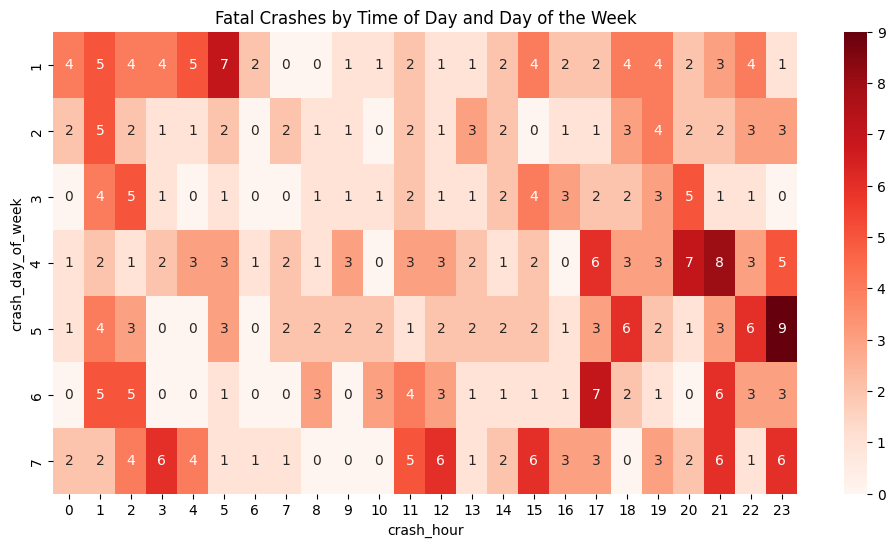

In [ ]:
if {'injuries_fatal', 'crash_hour', 'crash_day_of_week', 'crash_month'}.issubset(df.columns):
    plt.figure(figsize=(12, 6))
    sns.heatmap(pd.pivot_table(df, values='injuries_fatal', index='crash_day_of_week', columns='crash_hour', aggfunc='sum'), cmap='Reds', annot=True)
    plt.title("Fatal Crashes by Time of Day and Day of the Week")
    plt.show()

# The heatmap visualizes **fatal crashes by time of day and day of the week**:

- **Evening and late-night hours (17:00 - 23:00) show higher fatal crash frequencies**, especially on **Fridays and Saturdays**.
- **Early morning hours (4:00 - 9:00) tend to have fewer fatal crashes** across all days.
- **Peak fatal crashes occur around 2:00-3:00 AM and 18:00-22:00 PM**, likely due to **fatigue, impaired driving (late-night), and high traffic volume (evening rush hour)**.
- **Weekend nights (Friday and Saturday) have the highest crash numbers**, possibly linked to increased social activities and alcohol consumption.

This suggests that **nighttime and weekend hours pose the highest fatal crash risk**.

## 5.	What is the combined effect of traffic control devices, lighting conditions, and intersection types on accident occurrences?

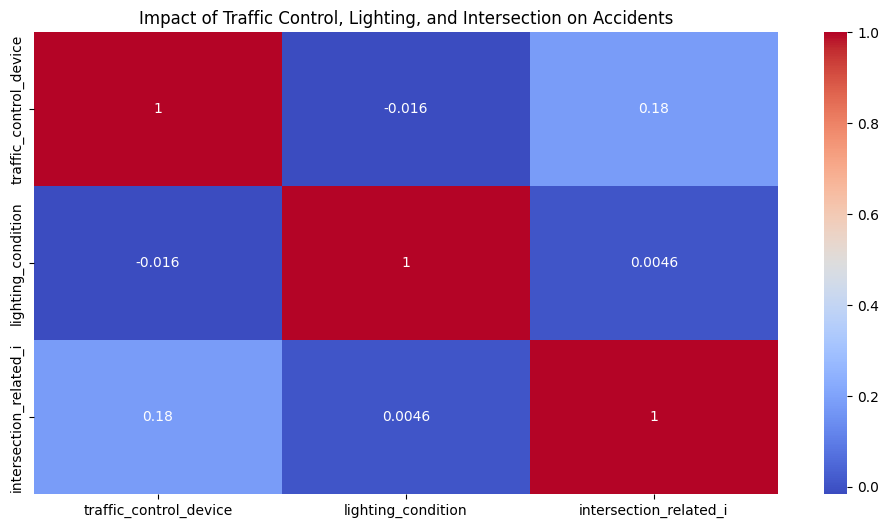

In [ ]:
if {'traffic_control_device', 'lighting_condition', 'intersection_related_i'}.issubset(df.columns):
    plt.figure(figsize=(12, 6))
    sns.heatmap(df[['traffic_control_device', 'lighting_condition', 'intersection_related_i']].corr(), annot=True, cmap='coolwarm')
    plt.title("Impact of Traffic Control, Lighting, and Intersection on Accidents")
    plt.show()

# This heatmap shows the **correlation between traffic control devices, lighting conditions, and intersection-related accidents**:  

- **Traffic control devices and intersection-related accidents have a weak positive correlation (0.18)**, meaning intersections with traffic controls may slightly influence accident occurrences.  
- **Lighting conditions have almost no correlation with either traffic control devices (-0.016) or intersection-related accidents (0.0046)**, suggesting that lighting has little impact on the presence of traffic control devices or intersection-related crashes.  
- **Overall, no strong correlations exist between these variables**, indicating other factors might play a more significant role in accident occurrences.

## 6.	How do different crash types vary in injury severity when accounting for weather and lighting conditions?

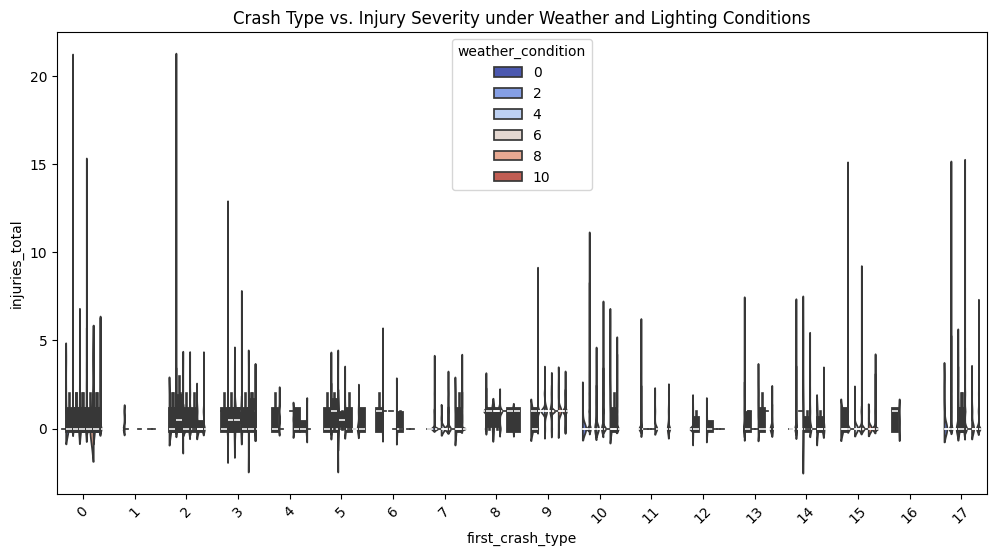

In [ ]:
if {'first_crash_type', 'weather_condition', 'lighting_condition', 'injuries_total'}.issubset(df.columns):
    plt.figure(figsize=(12, 6))
    sns.violinplot(data=df, x='first_crash_type', y='injuries_total', hue='weather_condition', split=True, palette='coolwarm')
    plt.xticks(rotation=45)
    plt.title("Crash Type vs. Injury Severity under Weather and Lighting Conditions")
    plt.show()

# This violin plot displays the relationship between crash type, injury severity, and weather conditions. Here's a brief interpretation:

- The x-axis represents the type of crash (e.g., rear-end, head-on, etc.).
- The y-axis represents the total number of injuries.
- The color of the violins represents different weather conditions.
- The width of the violin indicates the density of the data points.



## 7.	Are accidents involving multiple vehicles more likely to happen under specific weather and road conditions?

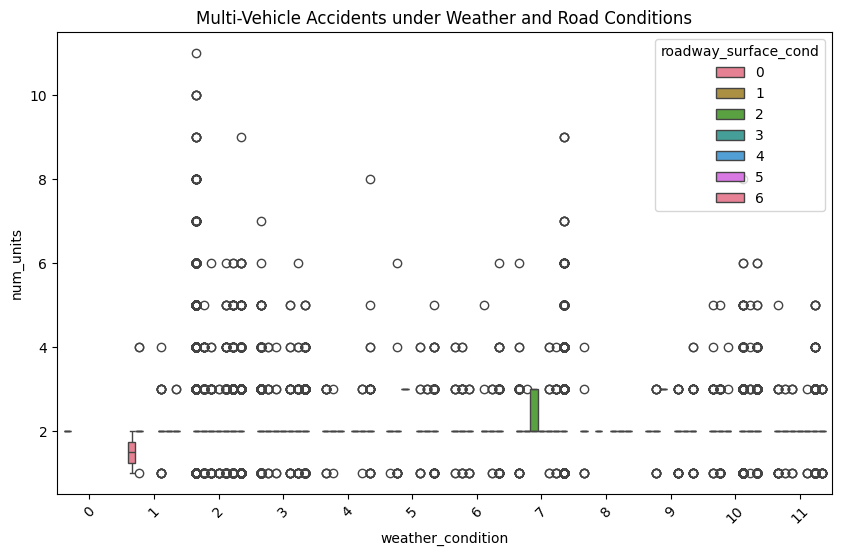

In [ ]:
if {'num_units', 'weather_condition', 'roadway_surface_cond'}.issubset(df.columns):
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x='weather_condition', y='num_units', hue='roadway_surface_cond', palette='husl')
    plt.title("Multi-Vehicle Accidents under Weather and Road Conditions")
    plt.xticks(rotation=45)
    plt.show()

# This boxplot shows:

- Weather conditions (e.g., rain, snow) impact the number of vehicles involved in accidents.
- Road surface conditions (e.g., wet, icy) also affect the number of vehicles involved.
- Certain weather-road surface combinations (e.g., rain-wet) tend to have more multi-vehicle accidents.

## 8.	What role do primary contributory causes, trafficway type, and intersection-related factors play in determining crash severity?

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


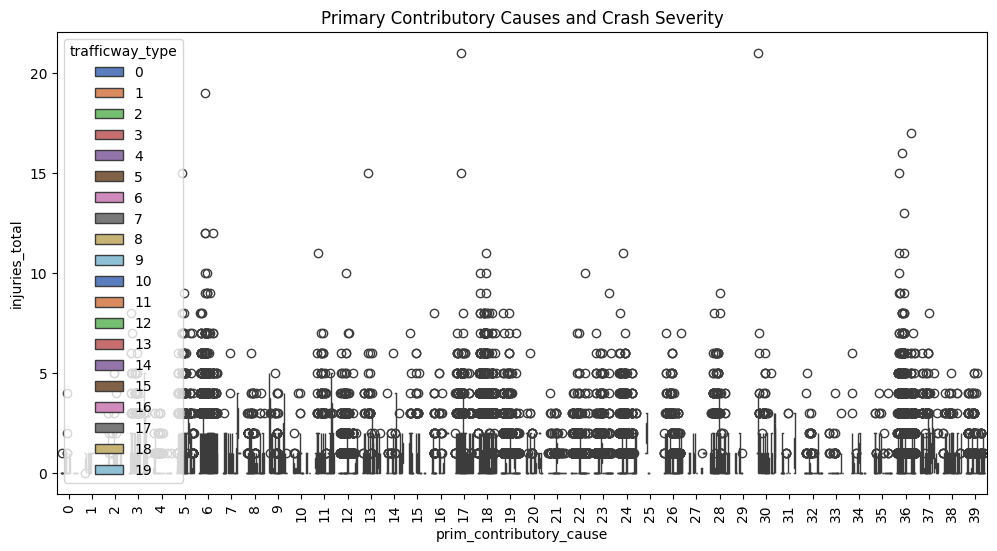

In [ ]:
if {'prim_contributory_cause', 'trafficway_type', 'intersection_related_i', 'injuries_total'}.issubset(df.columns):
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df, x='prim_contributory_cause', y='injuries_total', hue='trafficway_type', palette='muted')
    plt.xticks(rotation=90)
    plt.title("Primary Contributory Causes and Crash Severity")
    plt.show()

# This boxplot shows:

- Primary contributory causes (e.g., speeding, failure to yield) vary in their association with crash severity (injuries_total).
- Certain trafficway types (e.g., highways, urban roads) tend to have more severe crashes for specific contributory causes.
- Speeding and failure to yield appear to be associated with more severe crashes across various trafficway types.

In [ ]:
df.columns

Index(['crash_date', 'traffic_control_device', 'weather_condition',
       'lighting_condition', 'first_crash_type', 'trafficway_type',
       'alignment', 'roadway_surface_cond', 'road_defect', 'crash_type',
       'intersection_related_i', 'damage', 'prim_contributory_cause',
       'num_units', 'most_severe_injury', 'injuries_total', 'injuries_fatal',
       'injuries_incapacitating', 'injuries_non_incapacitating',
       'injuries_reported_not_evident', 'injuries_no_indication', 'crash_hour',
       'crash_day_of_week', 'crash_month', 'CRASH_DATE', 'YEAR', 'HOUR',
       'DAY_OF_WEEK', 'MONTH'],
      dtype='object')

In [ ]:
df.describe()

,crash_date,traffic_control_device,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect,crash_type,...,injuries_reported_not_evident,injuries_no_indication,crash_hour,crash_day_of_week,crash_month,CRASH_DATE,YEAR,HOUR,DAY_OF_WEEK,MONTH
count,209306,209306.000000,209306.000000,209306.000000,209306.000000,209306.000000,209306.000000,209306.000000,209306.000000,209306.000000,...,209306.000000,209306.000000,209306.000000,209306.000000,209306.000000,209306,209306.00000,209306.000000,209306.000000,209306.000000
mean,2020-12-08 23:26:35.213802240,14.022274,3.131353,2.437221,9.746668,6.885861,3.010946,1.371695,1.697701,0.560787,...,0.121516,2.244002,13.373047,4.144024,6.771822,2020-12-08 23:26:35.213802240,2020.41716,13.373047,2.958214,6.771822
min,2013-03-03 16:48:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,2013-03-03 16:48:00,2013.00000,0.000000,0.000000,1.000000
25%,2018-12-03 10:18:45,15.000000,2.000000,1.000000,1.250000,6.000000,3.000000,0.000000,1.000000,0.000000,...,0.000000,2.000000,9.000000,2.000000,4.000000,2018-12-03 10:18:45,2018.00000,9.000000,1.000000,4.000000
50%,2020-12-19 16:39:00,16.000000,2.000000,3.000000,10.000000,8.000000,3.000000,0.000000,1.000000,1.000000,...,0.000000,2.000000,14.000000,4.000000,7.000000,2020-12-19 16:39:00,2020.00000,14.000000,3.000000,7.000000
75%,2023-01-08 02:33:45,16.000000,2.000000,3.000000,17.000000,8.000000,3.000000,1.000000,1.000000,1.000000,...,0.000000,3.000000,17.000000,6.000000,10.000000,2023-01-08 02:33:45,2023.00000,17.000000,5.000000,10.000000
max,2025-01-18 00:17:00,18.000000,11.000000,5.000000,17.000000,19.000000,5.000000,6.000000,6.000000,1.000000,...,15.000000,49.000000,23.000000,7.000000,12.000000,2025-01-18 00:17:00,2025.00000,23.000000,6.000000,12.000000
std,NaN,4.174489,2.476463,1.074239,6.700632,3.553885,0.192001,2.400657,1.516204,0.496292,...,0.450865,1.241175,5.603830,1.966864,3.427593,NaN,2.42645,5.603830,2.043621,3.427593


In [ ]:
df.shape

(209306, 29)

In [ ]:
df.isnull().sum()

,0
crash_date,0
traffic_control_device,0
weather_condition,0
lighting_condition,0
first_crash_type,0
trafficway_type,0
alignment,0
roadway_surface_cond,0
road_defect,0
crash_type,0


In [ ]:
# Convert crash_date to datetime format
df['crash_date'] = pd.to_datetime(df['crash_date'], errors='coerce')

# Check for missing values
missing_values = df.isnull().sum()

# Summary statistics for numerical columns
summary_stats = df.describe()


<ipython-input-57-0da5bfb6f11d>:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 2].set_xticklabels(axes[0, 2].get_xticklabels(), rotation=45, ha="right")
<ipython-input-57-0da5bfb6f11d>:31: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['injuries_fatal'] > 0]['crash_hour'], shade=True, color='red', ax=axes[1, 1])
<ipython-input-57-0da5bfb6f11d>:50: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[2, 2].set_xticklabels(axes[2, 2].get_xticklabels(), rotation=45, ha="right")


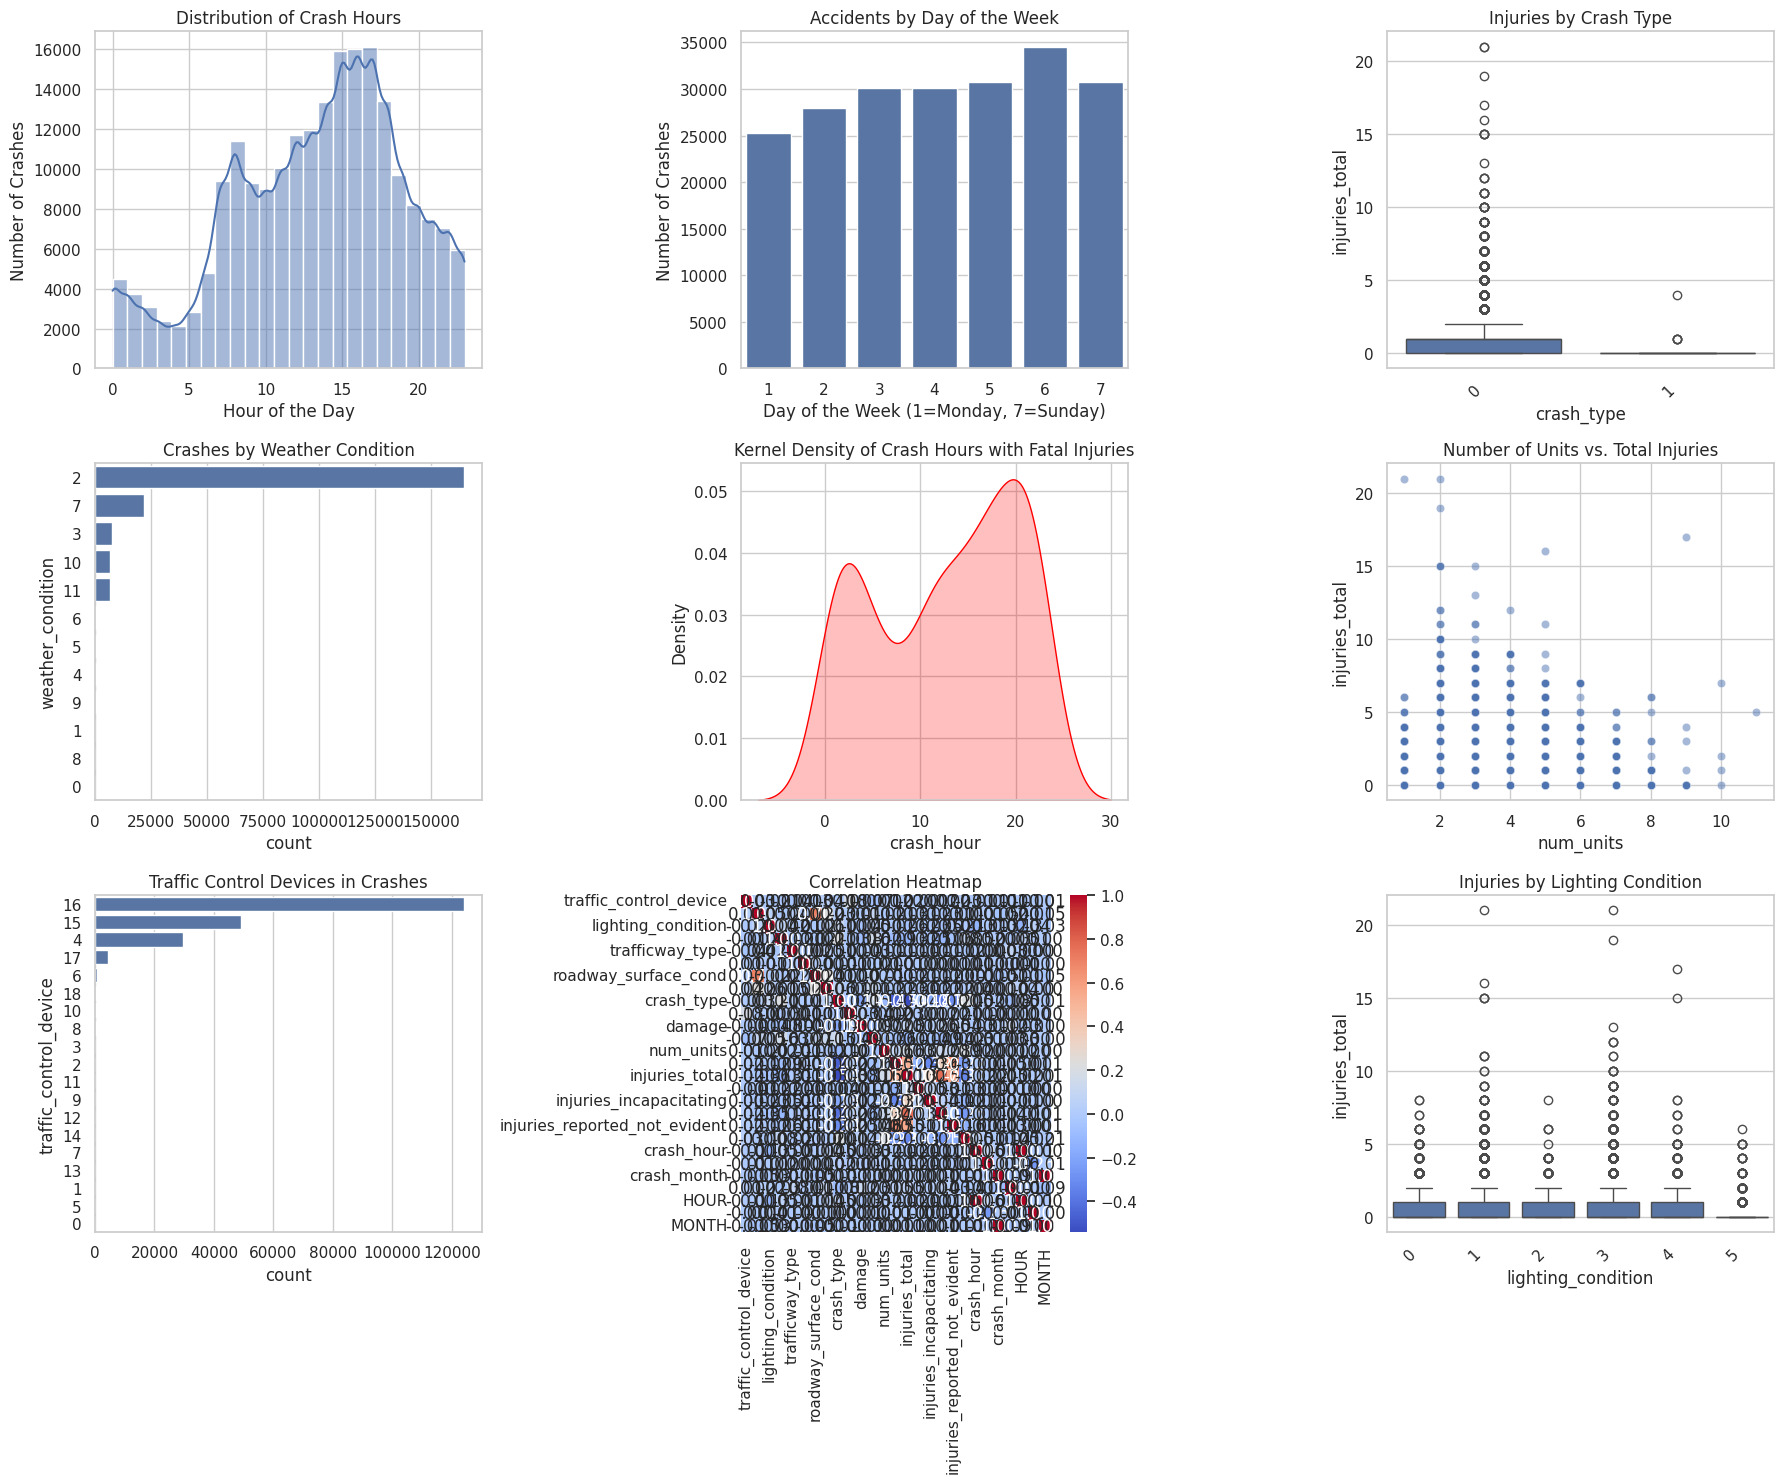

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plot style
sns.set_theme(style="whitegrid")

# Define figure size for better visibility
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
# 1. Histogram of Crash Hours
sns.histplot(df['crash_hour'], bins=24, kde=True, ax=axes[0, 0])
axes[0, 0].set_title("Distribution of Crash Hours")
axes[0, 0].set_xlabel("Hour of the Day")
axes[0, 0].set_ylabel("Number of Crashes")

# 2. Countplot of Accidents per Day of the Week
sns.countplot(x='crash_day_of_week', data=df, ax=axes[0, 1])
axes[0, 1].set_title("Accidents by Day of the Week")
axes[0, 1].set_xlabel("Day of the Week (1=Monday, 7=Sunday)")
axes[0, 1].set_ylabel("Number of Crashes")

# 3. Boxplot of Injuries by Crash Type
sns.boxplot(x='crash_type', y='injuries_total', data=df, ax=axes[0, 2])
axes[0, 2].set_title("Injuries by Crash Type")
axes[0, 2].set_xticklabels(axes[0, 2].get_xticklabels(), rotation=45, ha="right")

# 4. Countplot of Weather Conditions during Crashes
sns.countplot(y='weather_condition', data=df, order=df['weather_condition'].value_counts().index, ax=axes[1, 0])
axes[1, 0].set_title("Crashes by Weather Condition")

# 5. KDE Plot for Crash Hours with Fatal Injuries
sns.kdeplot(df[df['injuries_fatal'] > 0]['crash_hour'], shade=True, color='red', ax=axes[1, 1])
axes[1, 1].set_title("Kernel Density of Crash Hours with Fatal Injuries")

# 6. Scatter Plot: Number of Units vs. Injuries Total
sns.scatterplot(x='num_units', y='injuries_total', data=df, ax=axes[1, 2], alpha=0.5)
axes[1, 2].set_title("Number of Units vs. Total Injuries")

# 7. Countplot of Traffic Control Devices in Crashes
sns.countplot(y='traffic_control_device', data=df, order=df['traffic_control_device'].value_counts().index, ax=axes[2, 0])
axes[2, 0].set_title("Traffic Control Devices in Crashes")

# 8. Heatmap of Correlation Between Numerical Features
corr_matrix = df.select_dtypes(include=['number']).corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", ax=axes[2, 1])
axes[2, 1].set_title("Correlation Heatmap")

# 9. Boxplot of Injuries by Lighting Conditions
sns.boxplot(x='lighting_condition', y='injuries_total', data=df, ax=axes[2, 2])
axes[2, 2].set_title("Injuries by Lighting Condition")
axes[2, 2].set_xticklabels(axes[2, 2].get_xticklabels(), rotation=45, ha="right")

plt.tight_layout()
plt.show()